# **Phishing Website Detection by Machine Learning Techniques**

*Final project of AI & Cybersecurity Course*

## Loading Data:

In [44]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
#Loading the data
data0 = pd.read_csv('urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


##  Let's have look to the Data

In [46]:
#Checking the shape of the dataset
data0.shape

(10000, 18)

In [47]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [48]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

## Visualizing the data


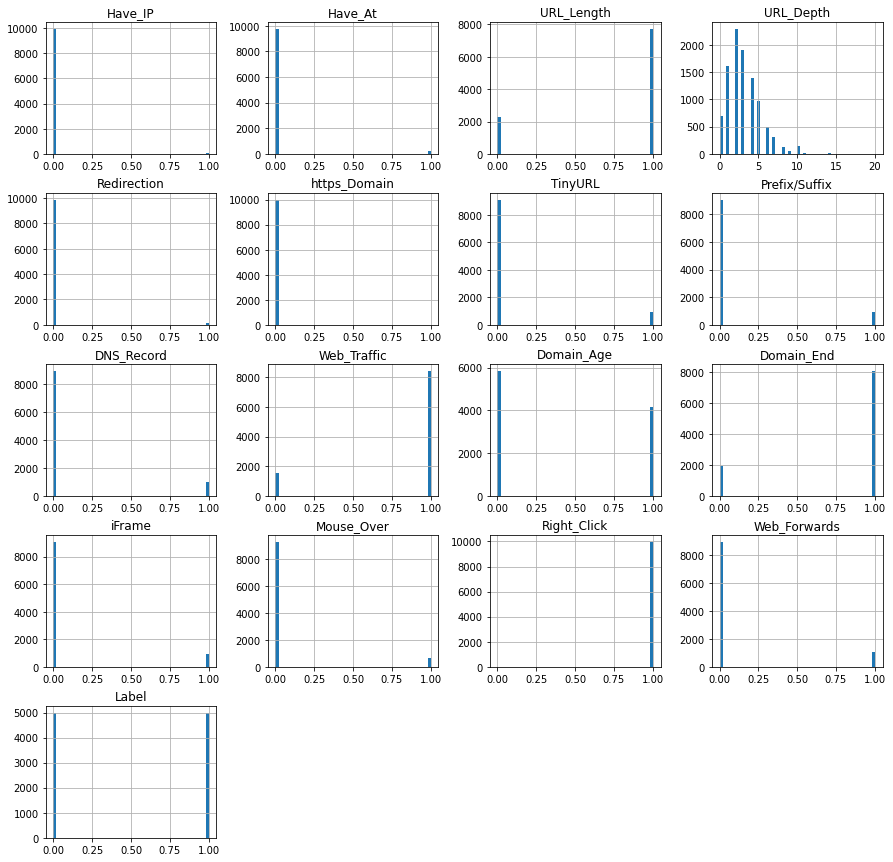

In [49]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

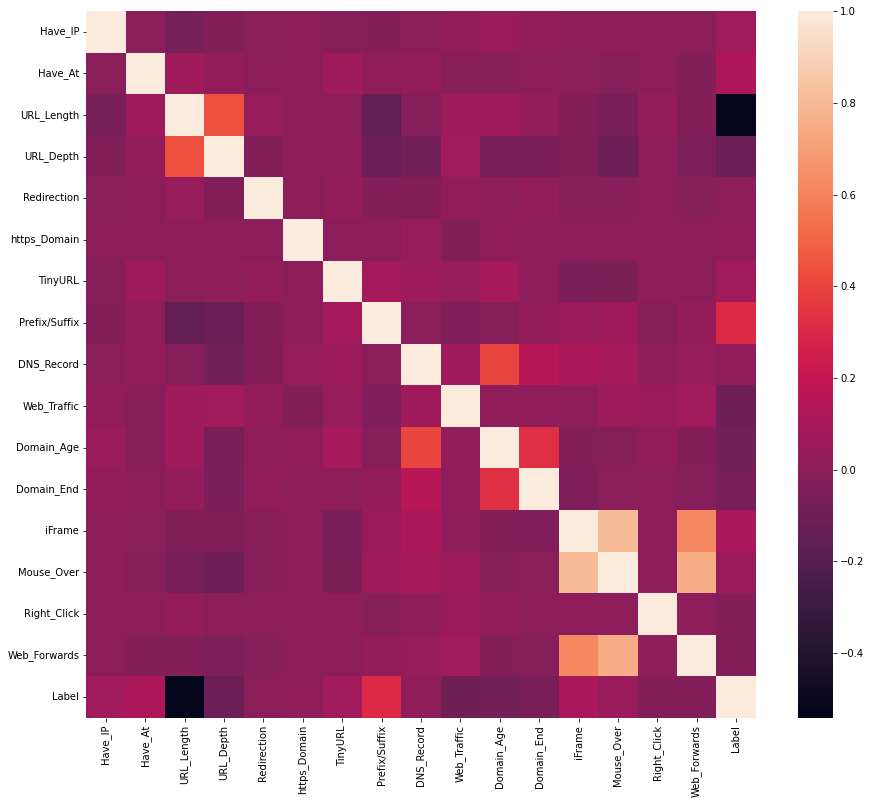

In [50]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

## Data Preprocessing & EDA


In [51]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [52]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [53]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data. 

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [54]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,0,0
1,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,1
4,0,0,1,2,0,0,0,0,0,0,1,1,0,0,1,0,0


From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [55]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [56]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

## Machine Learning Models & Training


In [57]:
#importing packages
from sklearn.metrics import accuracy_score

In [58]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=30)
l_model = LogisticRegression()

l_model.fit(train_X, train_y)

val_predict = l_model.predict(val_X)
mean_absolute_error(val_y, val_predict)

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.19533333333333333

In [60]:
accuracy = accuracy_score(val_y, val_predict)
conf_matrix = confusion_matrix(val_y, val_predict)
class_report = classification_report(val_y, val_predict)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8046666666666666
Confusion Matrix:
 [[1386   65]
 [ 521 1028]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.96      0.83      1451
           1       0.94      0.66      0.78      1549

    accuracy                           0.80      3000
   macro avg       0.83      0.81      0.80      3000
weighted avg       0.84      0.80      0.80      3000



### Decision Tree Classifier

In [61]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 15)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

In [62]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [63]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)
print("Decision Tree: Accuracy on train Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on train Data: 0.869
Decision Tree: Accuracy on test Data: 0.855


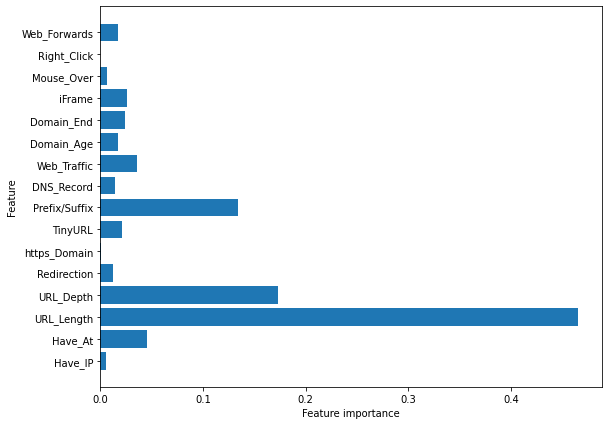

In [64]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [65]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### Random Forest Classifier

In [66]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=15)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15)

In [67]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [68]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)
print("Random forest: Accuracy on train Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on train Data: 0.869
Random forest: Accuracy on test Data: 0.855


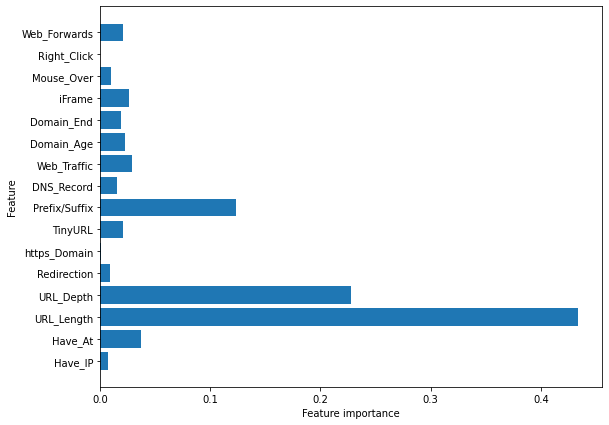

In [69]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [70]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### Multilayer Perceptrons (MLPs): Deep Learning

In [71]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [72]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Performance Evaluation:**

In [73]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.861
Multilayer Perceptrons: Accuracy on test Data: 0.849


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (100,) and arg 3 with shape (16,).

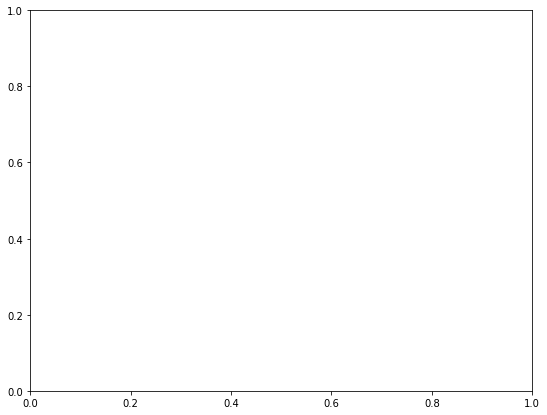

In [74]:


# Checking the feature importance in the MLP model
plt.figure(figsize=(9, 7))
n_features_mlp = X_train.shape[1]
# Assuming mlp is already trained
weights = np.abs(mlp.coefs_[0])  # Extracting weights from the first layer

# Calculate the importance scores based on weights
importance_mlp = weights.sum(axis=0)

# Plotting the bar chart
plt.barh(range(n_features_mlp), importance_mlp, align='center')
plt.yticks(np.arange(n_features_mlp), X_train.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("MLP Model - Feature Importance")
plt.show()


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

###  XGBoost Classifier

In [34]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.1,max_depth=8)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [35]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [36]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.862
XGBoost : Accuracy on test Data: 0.872


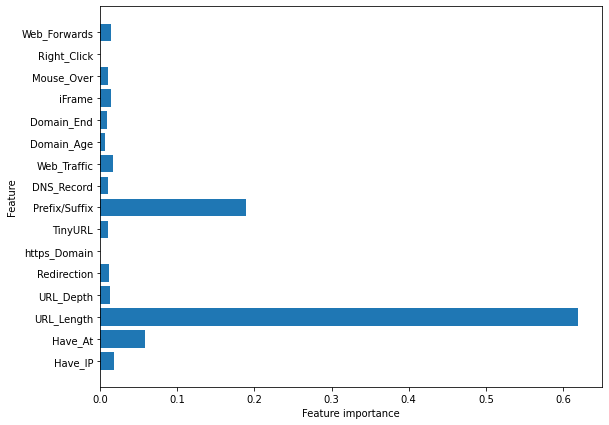

In [37]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), xgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [38]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### Support Vector Machines

In [39]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=15)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=15)

In [40]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [597]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.805
SVM : Accuracy on test Data: 0.789


In [43]:
# # Visualizing feature importance for SVM with linear kernel
# plt.figure(figsize=(9,7))
# coefficients = svm.coef_.flatten()
# plt.barh(range(n_features), coefficients, align='center')
# plt.yticks(np.arange(n_features), X_train.columns)
# plt.xlabel("Coefficient Magnitude")
# plt.ylabel("Feature")
# plt.title("Feature Importance for SVM (Linear Kernel)")
# plt.show()


**Storing the results:**

In [598]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

### Ensemble Model (MLP + XGboost)

In [599]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=20, random_state=52)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models
xgb_model = XGBClassifier(learning_rate=0.1, max_depth=8)  # Adjusted learning_rate and max_depth
mlp_model = MLPClassifier(hidden_layer_sizes=(100,))  # Adjusted hidden_layer_sizes

# Initialize the meta-learner (Logistic Regression in this case)
meta_learner = LogisticRegression()

# Create the ensemble model
ensemble_model = StackingClassifier(
    estimators=[('xgb', xgb_model), ('mlp', mlp_model)],
    final_estimator=meta_learner
)

# Train the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
y_train_pred = ensemble_model.predict(X_train)
y_test_pred  = ensemble_model.predict(X_test)

# Evaluate the ensemble model
acc_test_ens1  = accuracy_score(y_test, y_test_pred)
acc_train_ens1 = accuracy_score(y_train, y_train_pred)
print(f'Test Accuracy: {acc_test_ens1:.2f}')
print(f'Train Accuracy: {acc_train_ens1:.2f}')



C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Opti

Test Accuracy: 0.94
Train Accuracy: 1.00


C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Storing the results:**

In [600]:
storeResults('XG+MLP', acc_train_ens1, acc_test_ens1)

# Ensemble Model (MLP + Decision Tree)

In [601]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=20, random_state=52)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models
mlp_model = MLPClassifier(hidden_layer_sizes=(100,))  # Adjusted hidden_layer_sizes for MLP
dt_model = DecisionTreeClassifier(max_depth=5)  # Adjusted max_depth for Decision Tree

# Initialize the meta-learner (Logistic Regression in this case)
meta_learner = LogisticRegression()

# Create the ensemble model
ensemble_model = StackingClassifier(
    estimators=[('mlp', mlp_model), ('dt', dt_model)],
    final_estimator=meta_learner
)

# Train the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
y_train_pred = ensemble_model.predict(X_train)
y_test_pred  = ensemble_model.predict(X_test)

# Evaluate the ensemble model
acc_test_ens2  = accuracy_score(y_test, y_test_pred)
acc_train_ens2 = accuracy_score(y_train, y_train_pred)
print(f'Test Accuracy: {acc_test_ens2:.2f}')
print(f'Train Accuracy: {acc_train_ens2:.2f}')


C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Opti

Test Accuracy: 0.90
Train Accuracy: 0.97


C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Storing the results:**

In [602]:
storeResults('DT+MLP', acc_train_ens2, acc_test_ens2)

# Ensemble Model (MLP + Random Forest)

In [603]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=20, random_state=52)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models
mlp_model = MLPClassifier(hidden_layer_sizes=(100,))  # Adjusted hidden_layer_sizes for MLP
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)  # Adjusted n_estimators and max_depth for Random Forest

# Initialize the meta-learner (Logistic Regression in this case)
meta_learner = LogisticRegression()

# Create the ensemble model
ensemble_model = StackingClassifier(
    estimators=[('mlp', mlp_model), ('rf', rf_model)],
    final_estimator=meta_learner
)

# Train the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
y_train_pred = ensemble_model.predict(X_train)
y_test_pred  = ensemble_model.predict(X_test)

# Evaluate the ensemble model
acc_test_ens3  = accuracy_score(y_test, y_test_pred)
acc_train_ens3 = accuracy_score(y_train, y_train_pred)
print(f'Test Accuracy: {acc_test_ens3:.2f}')
print(f'Train Accuracy: {acc_train_ens3:.2f}')


C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Opti

Test Accuracy: 0.88
Train Accuracy: 0.95


**Storing the results:**

In [604]:
storeResults('RF+MLP', acc_train_ens3, acc_test_ens3)

In [605]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=20, random_state=52)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models
mlp_model = MLPClassifier(hidden_layer_sizes=(100,))  # Adjusted hidden_layer_sizes for MLP
svm_model = SVC(kernel='linear', C=1.0)  # Adjusted kernel and C for SVM

# Initialize the meta-learner (Logistic Regression in this case)
meta_learner = LogisticRegression()

# Create the ensemble model
ensemble_model = StackingClassifier(
    estimators=[('mlp', mlp_model), ('svm', svm_model)],
    final_estimator=meta_learner
)

# Train the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
y_train_pred = ensemble_model.predict(X_train)
y_test_pred  = ensemble_model.predict(X_test)

# Evaluate the ensemble model
acc_test_ens4  = accuracy_score(y_test, y_test_pred)
acc_train_ens4 = accuracy_score(y_train, y_train_pred)
print(f'Test Accuracy: {acc_test_ens4:.2f}')
print(f'Train Accuracy: {acc_train_ens4:.2f}')


C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Opti

Test Accuracy: 0.89
Train Accuracy: 0.91


In [606]:
storeResults('SVM+MLP', acc_train_ens4, acc_test_ens4)

## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [607]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.868,0.862
1,Random Forest,0.868,0.861
2,Multilayer Perceptrons,0.866,0.866
3,XGBoost,0.863,0.856
4,SVM,0.805,0.789
5,XG+MLP,1.000,0.945
6,DT+MLP,0.972,0.900
7,RF+MLP,0.952,0.880
8,SVM+MLP,0.912,0.890


In [608]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False).reset_index(drop=True)

,ML Model,Train Accuracy,Test Accuracy
0,XG+MLP,1.000,0.945
1,DT+MLP,0.972,0.900
2,SVM+MLP,0.912,0.890
3,RF+MLP,0.952,0.880
4,Multilayer Perceptrons,0.866,0.866
5,Decision Tree,0.868,0.862
6,Random Forest,0.868,0.861
7,XGBoost,0.863,0.856
8,SVM,0.805,0.789
